In [1]:
import pandas as pd 
df=pd.read_csv('train_data.csv')  #read the csv file into pandas frame

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,6-11-2021,7
1,category_4,836584,18-11-2021,16
2,category_1,370195,24-1-2022,6
3,category_2,172582,30-10-2021,5
4,category_2,1006009,30-10-2021,5
...,...,...,...,...
19916,category_2,225259,4-10-2021,4
19917,category_2,111436,12-10-2021,1
19918,category_2,1098502,1-10-2021,1
19919,category_2,20824,1-10-2021,7


In [4]:
df.columns

Index(['CategoryCode', 'ItemCode', 'DateID', 'DailySales'], dtype='object')

In [5]:
df.describe().round(2)

,ItemCode,DailySales
count,19921.00,19921.00
mean,611060.96,7.35
std,454986.78,14.61
min,3418.00,1.00
25%,117610.00,2.00
50%,837943.00,3.00
75%,1058713.00,7.00
max,1105027.00,434.00


In [6]:
corr_matrix = df.corr().round(2)
corr_matrix

,ItemCode,DailySales
ItemCode,1.00,-0.13
DailySales,-0.13,1.00


In [7]:
#df['wom'] = df['Date'].apply(lambda d: (d.day-1) // 7 + 1)

In [8]:
import datetime
df['Date'] = pd.to_datetime(df['DateID'])
df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['week'] = pd.DatetimeIndex(df['Date']).week
#df['week'] = pd.DatetimeIndex(df['Date'].isocalendar().week)
df['dayofyear'] = pd.DatetimeIndex(df['Date']).dayofyear
df['weekday'] = pd.DatetimeIndex(df['Date']).weekday
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['is_month_start'] = pd.DatetimeIndex(df['Date']).is_month_start
df['is_month_end'] = pd.DatetimeIndex(df['Date']).is_month_end
print(df.info())

<ipython-input-8-f28c6211e45d>:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = pd.DatetimeIndex(df['Date']).week


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19921 entries, 0 to 19920
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CategoryCode    19921 non-null  object
 1   ItemCode        19921 non-null  int64 
 2   DateID          19921 non-null  object
 3   DailySales      19921 non-null  int64 
 4   Date            19921 non-null  object
 5   year            19921 non-null  int64 
 6   month           19921 non-null  int64 
 7   day             19921 non-null  int64 
 8   week            19921 non-null  int64 
 9   dayofyear       19921 non-null  int64 
 10  weekday         19921 non-null  int64 
 11  quarter         19921 non-null  int64 
 12  is_month_start  19921 non-null  bool  
 13  is_month_end    19921 non-null  bool  
dtypes: bool(2), int64(9), object(3)
memory usage: 1.9+ MB
None


In [9]:
df

,CategoryCode,ItemCode,DateID,DailySales,Date,year,month,day,week,dayofyear,weekday,quarter,is_month_start,is_month_end
0,category_2,117610,6-11-2021,7,11.06.2021,2021,11,6,44,310,5,4,False,False
1,category_4,836584,18-11-2021,16,18.11.2021,2021,11,18,46,322,3,4,False,False
2,category_1,370195,24-1-2022,6,24.01.2022,2022,1,24,4,24,0,1,False,False
3,category_2,172582,30-10-2021,5,30.10.2021,2021,10,30,43,303,5,4,False,False
4,category_2,1006009,30-10-2021,5,30.10.2021,2021,10,30,43,303,5,4,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,category_2,225259,4-10-2021,4,10.04.2021,2021,10,4,40,277,0,4,False,False
19917,category_2,111436,12-10-2021,1,10.12.2021,2021,10,12,41,285,1,4,False,False
19918,category_2,1098502,1-10-2021,1,10.01.2021,2021,10,1,39,274,4,4,True,False
19919,category_2,20824,1-10-2021,7,10.01.2021,2021,10,1,39,274,4,4,True,False


In [10]:
df['week'].mask(df['week'] > 38, (df['week']-38)%4, inplace=True)

In [11]:
df['week'].mask(df['week']==0, 4, inplace=True)

In [12]:
df['week'].mask(df['week']==5, 1, inplace=True)

In [13]:
df['week'].mask(df['week']==6, 2, inplace=True)

In [14]:
df.head(20)


,CategoryCode,ItemCode,DateID,DailySales,Date,year,month,day,week,dayofyear,weekday,quarter,is_month_start,is_month_end
0,category_2,117610,6-11-2021,7,11.06.2021,2021,11,6,2,310,5,4,False,False
1,category_4,836584,18-11-2021,16,18.11.2021,2021,11,18,4,322,3,4,False,False
2,category_1,370195,24-1-2022,6,24.01.2022,2022,1,24,4,24,0,1,False,False
3,category_2,172582,30-10-2021,5,30.10.2021,2021,10,30,1,303,5,4,False,False
4,category_2,1006009,30-10-2021,5,30.10.2021,2021,10,30,1,303,5,4,False,False
5,category_2,903976,6-1-2022,1,01.06.2022,2022,1,6,1,6,3,1,False,False
6,category_1,145978,30-10-2021,3,30.10.2021,2021,10,30,1,303,5,4,False,False
7,category_1,1061341,24-1-2022,5,24.01.2022,2022,1,24,4,24,0,1,False,False
8,category_1,371239,5-1-2022,1,01.05.2022,2022,1,5,1,5,2,1,False,False
9,category_2,865933,8-2-2022,3,02.08.2022,2022,2,8,2,39,1,1,False,False


In [15]:
df_new=df[['CategoryCode', 'ItemCode','year','month','week','DailySales']]

In [16]:
df_new

,CategoryCode,ItemCode,year,month,week,DailySales
0,category_2,117610,2021,11,2,7
1,category_4,836584,2021,11,4,16
2,category_1,370195,2022,1,4,6
3,category_2,172582,2021,10,1,5
4,category_2,1006009,2021,10,1,5
...,...,...,...,...,...,...
19916,category_2,225259,2021,10,2,4
19917,category_2,111436,2021,10,3,1
19918,category_2,1098502,2021,10,1,1
19919,category_2,20824,2021,10,1,7


In [17]:
dt=df_new.groupby(['CategoryCode','ItemCode','year','month','week']).agg({'DailySales':['sum']})

In [18]:
dt

DailySales
                                             sum
CategoryCode ItemCode year month week           
category_1   3418     2021 10    1            73
                                 2            42
                                 3            41
                                 4            41
                           11    1            54
...                                          ...
category_4   1082743  2022 1     1            24
                                 2            20
                                 3            75
                                 4            60
                           2     2            83

[3413 rows x 1 columns]

In [19]:
dt.head(10)

DailySales
                                             sum
CategoryCode ItemCode year month week           
category_1   3418     2021 10    1            73
                                 2            42
                                 3            41
                                 4            41
                           11    1            54
                                 2            58
                                 3            43
                                 4            49
                           12    1            75
                                 2            96

In [20]:
dt.columns=['WeeklySales']

In [21]:
dt

WeeklySales
CategoryCode ItemCode year month week             
category_1   3418     2021 10    1              73
                                 2              42
                                 3              41
                                 4              41
                           11    1              54
...                                            ...
category_4   1082743  2022 1     1              24
                                 2              20
                                 3              75
                                 4              60
                           2     2              83

[3413 rows x 1 columns]

In [22]:
dt=dt.reset_index()

In [23]:
dt

,CategoryCode,ItemCode,year,month,week,WeeklySales
0,category_1,3418,2021,10,1,73
1,category_1,3418,2021,10,2,42
2,category_1,3418,2021,10,3,41
3,category_1,3418,2021,10,4,41
4,category_1,3418,2021,11,1,54
...,...,...,...,...,...,...
3408,category_4,1082743,2022,1,1,24
3409,category_4,1082743,2022,1,2,20
3410,category_4,1082743,2022,1,3,75
3411,category_4,1082743,2022,1,4,60


In [24]:
dt.head(30)

,CategoryCode,ItemCode,year,month,week,WeeklySales
0,category_1,3418,2021,10,1,73
1,category_1,3418,2021,10,2,42
2,category_1,3418,2021,10,3,41
3,category_1,3418,2021,10,4,41
4,category_1,3418,2021,11,1,54
5,category_1,3418,2021,11,2,58
6,category_1,3418,2021,11,3,43
7,category_1,3418,2021,11,4,49
8,category_1,3418,2021,12,1,75
9,category_1,3418,2021,12,2,96


In [25]:
test_data = pd.read_csv('test_data.csv')  #read the csv file into pandas frame

In [26]:
validation_data = pd.read_csv('validation_data.csv')  #read the csv file into pandas frame

In [27]:
validation_data

,CategoryCode,ItemCode,Week,WeeklySales
0,category_2,1044502,w1,11
1,category_2,1105009,w1,11
2,category_2,913561,w4,5
3,category_1,1048975,w4,30
4,category_1,17287,w2,60
...,...,...,...,...
365,category_2,124954,w2,43
366,category_2,40759,w1,48
367,category_1,1090303,w1,19
368,category_2,1090276,w3,6


In [28]:
dt[dt['ItemCode']==174436]

,CategoryCode,ItemCode,year,month,week,WeeklySales
1734,category_2,174436,2021,10,1,120
1735,category_2,174436,2021,10,2,64
1736,category_2,174436,2021,10,3,60
1737,category_2,174436,2021,10,4,69
1738,category_2,174436,2021,11,1,90
1739,category_2,174436,2021,11,2,83
1740,category_2,174436,2021,11,3,73
1741,category_2,174436,2021,11,4,47
1742,category_2,174436,2021,12,1,41
1743,category_2,174436,2021,12,2,70


In [29]:
dt_category1=dt[dt['CategoryCode']=='category_1']

In [30]:
dt_category1

,CategoryCode,ItemCode,year,month,week,WeeklySales
0,category_1,3418,2021,10,1,73
1,category_1,3418,2021,10,2,42
2,category_1,3418,2021,10,3,41
3,category_1,3418,2021,10,4,41
4,category_1,3418,2021,11,1,54
...,...,...,...,...,...,...
1178,category_1,1090303,2022,1,2,14
1179,category_1,1090303,2022,1,3,16
1180,category_1,1090303,2022,1,4,9
1181,category_1,1090303,2022,2,1,7


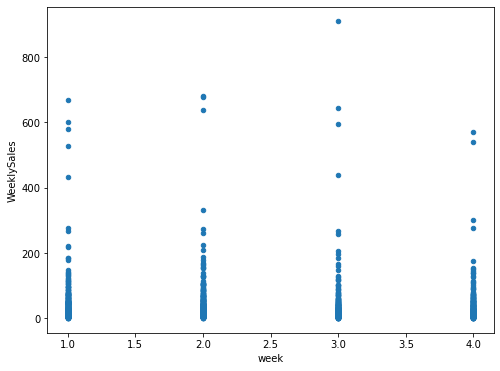

In [31]:
dt_category1.plot(kind = 'scatter',
           x = 'week',
           y = 'WeeklySales',
           figsize=(8,6))
plt.savefig('plot4.png')
plt.show()